In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import json
import warnings
warnings.filterwarnings('ignore')#忽略警告

In [2]:
movie = pd.read_csv('MoiveSpssl.csv',encoding='gbk')
movie.head(2)

,专家评论数,电影时长(分钟),导演facebook点赞数,演员3facebook点赞数,演员1facebook点赞数,总收入,评分用户数,演职人员facebook点赞总数,海报人物个数,用户评论数,预算,上映年份,演员2facebook点赞数,纵横比,电影facebook点赞数,评分
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,2009,936,1.78,33000,7.9
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,2007,5000,2.35,0,7.1


In [3]:
np.median(movie.评分)

6.6

In [4]:
#df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)
movie['评分2'] = movie['评分'].apply(lambda x:1 if x>6.6 else 0)
#data3['评分分类'] = 0
#data3['评分分类'] = data3['评分'].map(lambda x:1 if x>7.6 else 0)

In [5]:
movie.head(2)

,专家评论数,电影时长(分钟),导演facebook点赞数,演员3facebook点赞数,演员1facebook点赞数,总收入,评分用户数,演职人员facebook点赞总数,海报人物个数,用户评论数,预算,上映年份,演员2facebook点赞数,纵横比,电影facebook点赞数,评分,评分2
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,2009,936,1.78,33000,7.9,1
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,2007,5000,2.35,0,7.1,1


In [6]:
import pandas as pd

In [7]:
movie = pd.read_csv('movieChinese.csv',encoding='gbk')
movie.head(2)

,专家评论数,电影时长(分钟),导演facebook点赞数,演员3faceboo点赞数,演员1faceboo点赞数,总收入,评分用户数,演职人员facebook点赞总数,海报人物个数,用户评论数,预算,上映年份,演员2facebook点赞数,纵横比,电影facebook点赞数,评分,评分2
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,2009,936,1.78,33000,7.9,1
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,2007,5000,2.35,0,7.1,1


In [8]:
movie = movie.drop(['评分'],axis=1)

In [9]:
movie.shape

(3801, 16)

In [10]:
movie.head(2)

,专家评论数,电影时长(分钟),导演facebook点赞数,演员3faceboo点赞数,演员1faceboo点赞数,总收入,评分用户数,演职人员facebook点赞总数,海报人物个数,用户评论数,预算,上映年份,演员2facebook点赞数,纵横比,电影facebook点赞数,评分2
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,2009,936,1.78,33000,1
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,2007,5000,2.35,0,1


In [11]:
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [12]:
#X=movie.drop('评分2',axis=1)
#Y=movie.评分2
train,test=train_test_split(movie,test_size=0.3,random_state=0,stratify=movie['评分2'])
train_Y=train.评分2
train_X=train.drop('评分2',axis=1)
test_Y=test.评分2
test_X=test.drop('评分2',axis=1)
#X=data1.drop('score',axis=1)
#Y=data1.score

# LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_X,train_Y)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(train_X,train_Y)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(train_X,train_Y)))

Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71


In [14]:
predict = lda.predict(test_X)
precision = metrics.precision_score(test_Y,predict)
recall = metrics.recall_score(test_Y,predict)
accuracy = metrics.accuracy_score(test_Y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:77.71%,recall:51.42%
accuracy:70.64%


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 误判率

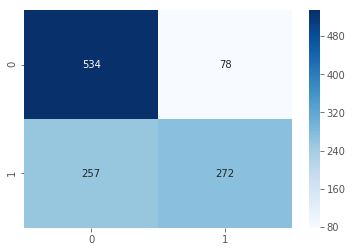

In [16]:
sns.heatmap(confusion_matrix(test_Y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

<Figure size 432x288 with 0 Axes>

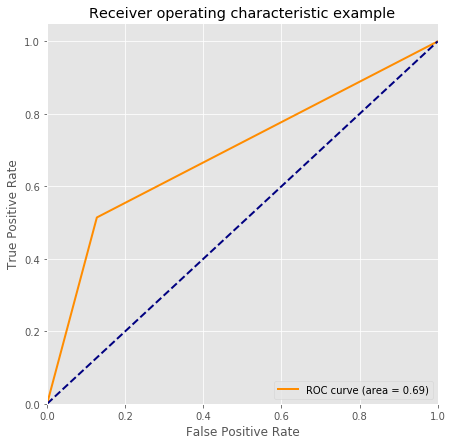

In [17]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
fpr,tpr,threshold = roc_curve(test_Y, predict) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)   ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# QDA

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_X,train_Y)
print('Accuracy of QDA classifier on training set: {:.2f}'
    .format(qda.score(train_X,train_Y)))
print('Accuracy of QDA classifier on test set: {:.2f}'
    .format(qda.score(train_X,train_Y)))

Accuracy of QDA classifier on training set: 0.70
Accuracy of QDA classifier on test set: 0.70


In [19]:
predict = qda.predict(test_X)
precision = metrics.precision_score(test_Y,predict)
recall = metrics.recall_score(test_Y,predict)
accuracy = metrics.accuracy_score(test_Y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:75.67%,recall:42.91%
accuracy:67.13%


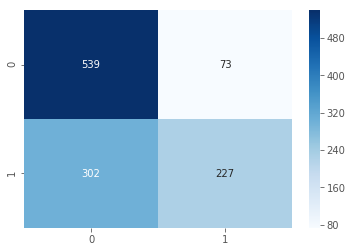

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(test_Y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

<Figure size 432x288 with 0 Axes>

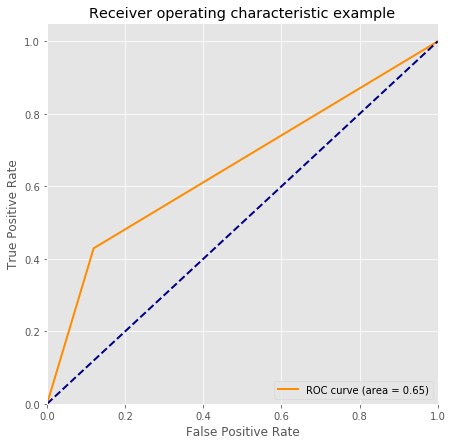

In [21]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
fpr,tpr,threshold = roc_curve(test_Y, predict) ###计算真正率和假正率
roc_auc = auc(fpr,tpr)   ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [22]:
#PCA 三个模块分别对应80 70 60信息量
from sklearn.decomposition import PCA
pca = PCA(n_components=9)#80％
pca.fit(train_X)
X_train = pca.transform(train_X)
X_test = pca.transform(test_X)
#isomap还没具体该参数
# from sklearn import manifold
# iso = manifold.Isomap(n_neighbors=4, n_components=2)
# iso.fit(df)
pca.components_
pca.explained_variance_ratio_

array([6.69405618e-01, 3.30593076e-01, 1.24771847e-06, 3.13895812e-08,
       2.45954188e-08, 1.86397214e-09, 6.43071879e-10, 2.78875087e-10,
       1.69416220e-11])

In [23]:
 print(pca.explained_variance_ratio_)  

[6.69405618e-01 3.30593076e-01 1.24771847e-06 3.13895812e-08
 2.45954188e-08 1.86397214e-09 6.43071879e-10 2.78875087e-10
 1.69416220e-11]


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,train_Y)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(X_train,train_Y)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(X_train,train_Y)))

Accuracy of LDA classifier on training set: 0.69
Accuracy of LDA classifier on test set: 0.69


In [25]:
predict = lda.predict(X_test)
precision = metrics.precision_score(test_Y,predict)
recall = metrics.recall_score(test_Y,predict)
accuracy = metrics.accuracy_score(test_Y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:81.13%,recall:40.64%
accuracy:68.10%


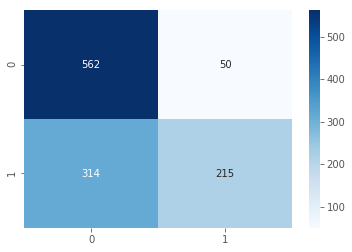

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(test_Y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train ,train_Y)
print('Accuracy of QDA classifier on training set: {:.2f}'
    .format(qda.score(X_train ,train_Y)))
print('Accuracy of QDA classifier on test set: {:.2f}'
    .format(qda.score(X_train ,train_Y)))
predict = qda.predict(X_test)
precision = metrics.precision_score(test_Y,predict)
recall = metrics.recall_score(test_Y,predict)
accuracy = metrics.accuracy_score(test_Y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

Accuracy of QDA classifier on training set: 0.67
Accuracy of QDA classifier on test set: 0.67
precision:76.10%,recall:39.13%
accuracy:66.08%


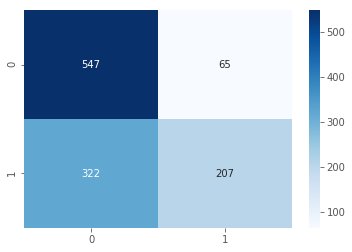

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(test_Y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

# 提取特征 Method2

In [34]:
X=movie.drop('评分2',axis=1)
Y=movie.评分2

In [35]:
def logic_choose_train(a, b): #提取特征
    from sklearn.linear_model import RandomizedLogisticRegression as RLR 
    RLR = RLR()
    RLR.fit(a, b)
    RLR.get_support()
    print('有效特征为：{}'.format(','.join(a.columns[RLR.get_support()])))
    x = a[a.columns[RLR.get_support()]]
    return x

#data=logic_choose_train(X,Y)
logic_choose_train(X,Y).head()

有效特征为：专家评论数,电影时长(分钟),导演facebook点赞数,总收入,评分用户数,海报人物个数,上映年份,纵横比,电影facebook点赞数


,专家评论数,电影时长(分钟),导演facebook点赞数,总收入,评分用户数,海报人物个数,上映年份,纵横比,电影facebook点赞数
0,723,178,0,760505847,886204,0,2009,1.78,33000
1,302,169,563,309404152,471220,0,2007,2.35,0
2,602,148,0,200074175,275868,1,2015,2.35,85000
3,813,164,22000,448130642,1144337,0,2012,2.35,164000
4,462,132,475,73058679,212204,1,2012,2.35,24000


In [36]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  # LR
from sklearn import svm # SVM
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # NB
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression as RLR
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics  
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV     #用pipline结合GridSearchCV，找到分数最高的保留特征数
from sklearn import preprocessing
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns

In [37]:
def train_test(data): 
    data['is_train'] = np.random.uniform(0,1,len(data)) <=0.8
    train,test = data[data['is_train']==True],data[data['is_train']==False] # 拆分训练集：测试集 = 4:1
    train_y = train.评分2.as_matrix() #x，y统一为numpy.ndarray
    tra_x = train.loc[:,['专家评论数','电影时长(分钟)','导演facebook点赞数','总收入','评分用户数','海报人物个数','上映年份','电影facebook点赞数']]
    train_x = preprocessing.scale(tra_x)   #数据标准化
    test_y = test.评分2.as_matrix()
    te_x = test.loc[:,['专家评论数','电影时长(分钟)','导演facebook点赞数','总收入','评分用户数','海报人物个数','上映年份','电影facebook点赞数']]
    test_x = preprocessing.scale(te_x)
    return train_x, train_y, test_x, test_y
train_x, train_y, test_x, test_y = train_test(movie)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_x,train_y)
print('Accuracy of LDA classifier on training set: {:.2f}'
    .format(lda.score(train_x,train_y)))
print('Accuracy of LDA classifier on test set: {:.2f}'
    .format(lda.score(train_x,train_y)))

Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71


In [52]:
predict = lda.predict(test_x)
precision = metrics.precision_score(test_y,predict)
recall = metrics.recall_score(test_y,predict)
accuracy = metrics.accuracy_score(test_y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:76.71%,recall:52.62%
accuracy:70.70%


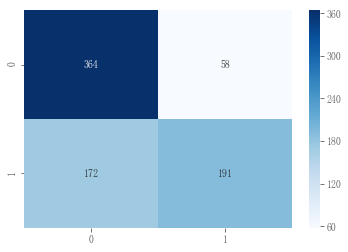

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(test_y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

# QDA

Accuracy of QDA classifier on training set: 0.70
Accuracy of QDA classifier on test set: 0.70
precision:80.75%,recall:47.38%
accuracy:70.45%


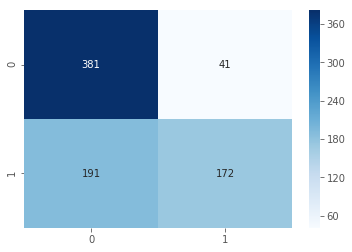

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_x,train_y)
print('Accuracy of QDA classifier on training set: {:.2f}'
    .format(qda.score(train_x,train_y)))
print('Accuracy of QDA classifier on test set: {:.2f}'
    .format(qda.score(train_x,train_y)))
predict = qda.predict(test_x)
precision = metrics.precision_score(test_y,predict)
recall = metrics.recall_score(test_y,predict)
accuracy = metrics.accuracy_score(test_y,predict)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(test_y,predict),cmap='Blues',annot=True,fmt='2.0f')
plt.show()

# pca  and lda

In [41]:
X.columns

Index(['专家评论数', '电影时长(分钟)', '导演facebook点赞数', '演员3faceboo点赞数', '演员1faceboo点赞数',
       '总收入', '评分用户数', '演职人员facebook点赞总数', '海报人物个数', '用户评论数', '预算', '上映年份',
       '演员2facebook点赞数', '纵横比', '电影facebook点赞数'],
      dtype='object')

In [42]:
def set_ch(): 
    "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return
set_ch() # 显示中文在plot中

In [43]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = movie

#X=movie.drop('评分2',axis=1)
#Y=movie.评分2
X = iris.drop('评分2',axis=1)
y = iris.评分2
target_names = [0,1]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))



Automatically created module for IPython interactive environment
explained variance ratio (first two components): [0.91226161 0.08773812]


Text(0.5,1,'PCA of Movie dataset')

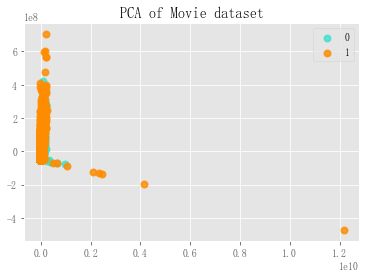

In [44]:
plt.figure()
colors = ['turquoise','darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Movie dataset')



In [45]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 432x288 with 0 Axes>

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  # LR
from sklearn import svm # SVM
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # NB
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression as RLR
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics  
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV     #用pipline结合GridSearchCV，找到分数最高的保留特征数
from sklearn import preprocessing
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns

# LR

In [48]:
model = LogisticRegression(class_weight='balanced')    #样本是失衡的
model.fit(train_x, train_y) 
predict = model.predict(test_x)
precision = metrics.precision_score(test_y, predict) 
recall = metrics.recall_score(test_y, predict)
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(test_y, predict) 
print('accuracy: %.2f%%' % (100 * accuracy))

precision: 76.07%, recall: 58.68%
accuracy: 72.36%


# NB

In [76]:
model=GaussianNB()
model.fit(train_x,train_y)
prediction6=model.predict(test_x)
#print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))



precision = metrics.precision_score(test_y,prediction6)
recall = metrics.recall_score(test_y,prediction6)
accuracy = metrics.accuracy_score(test_y,prediction6)
print('precision:%.2f%%,recall:%.2f%%'%(100*precision,100*recall))
print('accuracy:%.2f%%'%(100*accuracy))

precision:72.04%,recall:41.76%
accuracy:66.38%


# SVM

In [49]:
# SVM Classifier 
#model_SVM = SVC(kernel='rbf', probability=True)#rbf高斯kernel
model_SVM  = SVC(C=0.5, kernel='linear', decision_function_shape='ovr')#线性的效果最好
#smodel_SVM = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
model_SVM.fit(train_x, train_y)
predict_SVM = model_SVM.predict(test_x)
precision_SVM = metrics.precision_score(test_y, predict_SVM) 
recall_SVM = metrics.recall_score(test_y, predict_SVM)
print('precision: %.2f%%, recall: %.2f%%' % (100 * precision_SVM, 100 * recall_SVM))
accuracy_SVM = metrics.accuracy_score(test_y, predict_SVM) 
print('accuracy: %.2f%%' % (100 * accuracy_SVM))

precision: 82.57%, recall: 49.59%
accuracy: 71.85%
